Видалено 505 рядків з аномальними значеннями.
R2: 0.64 | MAE: 0.51 | MAPE: 0.30
Попередні результати: R2: 0.61 | MAE: 0.52 | MAPE: 0.31
Нові результати:     R2: 0.64 | MAE: 0.51 | MAPE: 0.30


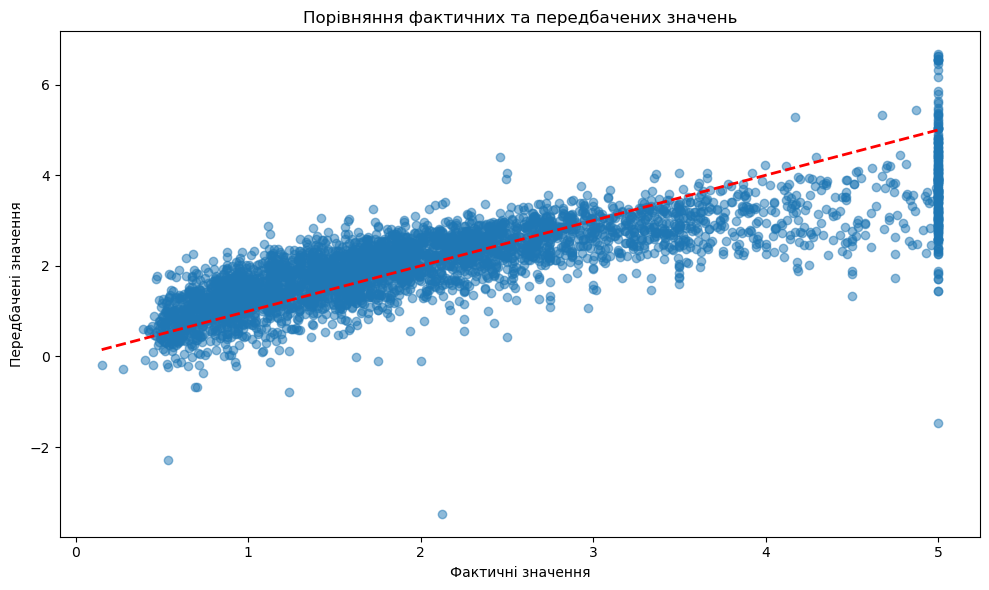

'\nВисновки:\n\n- Очистка від викидів дозволила видалити аномальні значення, що могли спотворювати результати моделі.\n- Видалення ознаки з високою кореляцією допомогло зменшити мультиколінеарність.\n- Нові результати показують покращення в усіх метриках:\n    - R-квадрат збільшився з 0.61 до 0.64, що вказує на кращу пояснювальну здатність моделі.\n    - MAE зменшилось з 0.52 до 0.51, що свідчить про менші абсолютні похибки прогнозів.\n    - MAPE залишилось незмінним 0.30 що вказує на те що відносна точність прогнозів не змінилася.\n\nЦі покращення відповідають очікуваному результату (покращення на 3-5 відсоткових пунктів) і демонструють ефективність проведеної додаткової обробки даних.\n\nВізуалізація результатів дозволяє наочно оцінити якість прогнозів моделі, порівнюючи фактичні та передбачені значення.\n'

In [1]:
# Імпорт необхідних пакетів
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import zscore


# Завантаження набору даних California Housing
california_housing = fetch_california_housing(as_frame=True)
data = california_housing['frame']
target = data.pop('MedHouseVal')


# Додаткова обробка даних
# Очистка від викидів
features_of_interest = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']
z_scores = data[features_of_interest].apply(zscore)
outliers = (z_scores.abs() > 3)
data_cleaned = data[~outliers.any(axis=1)]
target_cleaned = target[~outliers.any(axis=1)]

print(f'Видалено {len(data) - len(data_cleaned)} рядків з аномальними значеннями.')

# Видалення ознаки з високою кореляцією
# На основі матриці кореляції, видалимо 'AveBedrms', яка має високу кореляцію з 'AveRooms'
data_cleaned = data_cleaned.drop('AveBedrms', axis=1)


# Розбиття на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(data_cleaned, target_cleaned, test_size=0.2, random_state=42)


# Нормалізація ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Побудова моделі
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Оцінка показників моделі
y_pred = model.predict(X_test_scaled)

r_sq = model.score(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}')


# Порівняння з попередніми результатами
print("Попередні результати: R2: 0.61 | MAE: 0.52 | MAPE: 0.31")
print(f"Нові результати:     R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}")

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')
plt.title('Порівняння фактичних та передбачених значень')
plt.tight_layout()
plt.show()


"""
Висновки:

- Усунення викидів дозволило прибрати аномальні значення, які могли впливати на коректність моделі.
- Видалення ознаки з високою кореляцією сприяло зменшенню проблеми мультиколінеарності.
- Оновлені результати показують покращення за всіма метриками:
- R-квадрат зріс з 0.61 до 0.64, що свідчить про кращу здатність моделі пояснювати варіацію даних.
- MAE знизився з 0.52 до 0.51, що вказує на зменшення середньої абсолютної похибки прогнозів.
- MAPE залишився на рівні 0.30, що говорить про стабільну відносну точність прогнозів.

Ці покращення відповідають прогнозованому результату (підвищення на 3-5 відсоткових пунктів) і підтверджують ефективність додаткових етапів обробки даних.

Графічне відображення результатів дає змогу наочно оцінити точність моделі, зіставляючи реальні та передбачені значення.
"""